In [1]:
%matplotlib inline
from new_methods.new_methods import My_NuScenes

nusc = My_NuScenes(version='v1.0-mini', dataroot='/data/datasets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.224 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


100%|███████████████████████| 404/404 [00:25<00:00, 15.84it/s]


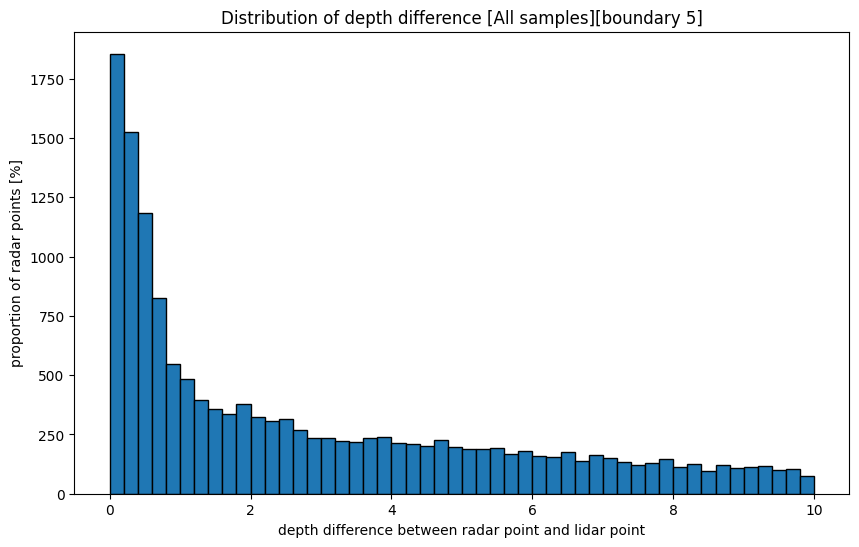

total number of radar pointclouds in 404 samples:  86928
total number of radar pointclouds who has near lidar pointcloud:  27094
total number of radar pointclouds who has no near lidar pointclouds:  59834


In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp

# 1600*900 for original image

total_dis = []
total_diff = []
total_no_pts = 0
boundary = 5
max_range = 10
boundary_path = 'boundary_'+str(boundary)
base_path = '/home/byounghun/workspace/Nuscenes_tutorial/visualization/Graphs/'
file_name = 'Total_samples.png'
for i in tqdm(range(len(nusc.sample))):
    dis, diff, no_pts = nusc.check_depth(nusc.sample[i]['token'], boundary=boundary)
    total_dis.extend(dis)
    total_diff.extend(diff)
    total_no_pts += no_pts


bins = 50
hist_t, bin_edges_t = np.histogram(total_diff, bins=bins, range=(0,max_range))#, density=True)
# hist_t = hist_t*100

plt.figure(figsize=(10, 6))
bar_centers = bin_edges_t[:-1] + np.diff(bin_edges_t) / 2
plt.bar(bar_centers, hist_t, width=np.diff(bin_edges_t), edgecolor='black')

plt.xlabel('depth difference between radar point and lidar point')
plt.ylabel('proportion of radar points [%]')
# plt.ylim(0,20)
# plt.yticks(np.arange(0,21,1))
plt.title('Distribution of depth difference '+'[All samples]' + '[boundary '+ str(boundary) + ']')

out_path = osp.join(base_path,boundary_path,file_name)
# plt.savefig(out_path)
plt.show()
print('total number of radar pointclouds in 404 samples: ', str(len(total_diff)+total_no_pts))
print('total number of radar pointclouds who has near lidar pointcloud: ', str(len(total_diff)))
print('total number of radar pointclouds who has no near lidar pointclouds: ', str(total_no_pts))

In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp

bins = 50
boundary = 3
boundary_path = 'boundary_'+str(boundary)
base_path = '/home/byounghun/workspace/Nuscenes_tutorial/visualization/Graphs/'

for n in tqdm(range(len(nusc.sample))):
    dis, diff, no_pts = nusc.check_depth(nusc.sample[n]['token'], boundary=boundary)
    hist, bin_edges = np.histogram(diff, bins=bins, range=(0,max_range), density=True)
    hist = hist*100
    proportion_difference = hist - hist_t
    
    colors = ['red' if value < 0 else 'blue' for value in proportion_difference]

    file_name = 'sample_'+str(n)+'.png'
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
    bar_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    axes[0].bar(bar_centers, hist, width=np.diff(bin_edges), edgecolor='black')
    axes[0].set_xlabel('depth difference between radar point and lidar point')
    axes[0].set_ylabel('proportion of radar points [%]')
    axes[0].set_ylim(0,20)
    axes[0].set_yticks(np.arange(0,21,1))
    axes[0].set_title('Distribution of depth difference '+'[sample_no: '+ str(n) + ']'+'[boundary '+ str(boundary) + ']')
    
    axes[1].bar(bar_centers, proportion_difference, color=colors, width=(max_range/bins), edgecolor='black')
    axes[1].set_xlabel('depth difference between radar point and lidar point')
    axes[1].set_ylabel('proportion difference of radar points [%p]')
    axes[1].set_ylim(-5,5)
    axes[1].set_yticks(np.arange(-10,10.5,0.5))
    axes[1].set_title('Proportion difference of depth difference '+'[sample_no: '+ str(n) + ']'+'[boundary '+ str(boundary) + ']')
    
    fig.suptitle('Depth difference distribution for [sample '+str(n)+']'+'[boundary '+ str(boundary) + ']')

    out_path = osp.join(base_path,boundary_path,file_name)
    plt.tight_layout
    plt.savefig(out_path)
    plt.close()
    
    # plt.show()

# # 막대 그래프로 표시
# plt.figure(figsize=(10, 6))
# bar_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
# plt.bar(bar_centers, hist, width=np.diff(bin_edges), edgecolor='black')

# plt.xlabel('depth difference between radar point and lidar point')
# plt.ylabel('proportion of radar points')
# plt.title('Distribution of depth difference '+'[sample_no: '+ str(n) + ']')
# plt.show()

 23%|█████▍                  | 92/404 [00:25<01:25,  3.63it/s]


KeyboardInterrupt: 

In [ ]:
proportion_difference = hist_t - hist

colors = ['red' if value < 0 else 'blue' for value in proportion_difference]

plt.figure(figsize=(10,6))
plt.bar(bar_centers, proportion_difference, color=colors, width=(max_range/bins), edgecolor='black')

plt.xlabel('depth difference between radar point and lidar point')
plt.ylabel('proportion difference of radar points')
plt.title('Proportion difference of depth difference '+'[sample_no: '+ str(n) + ']')
plt.show()